## Observations and Insights 

In [24]:
%matplotlib notebook

In [25]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [26]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [27]:
# Combine the data into a single dataset
combine_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how = "left" )
# Display the data table for preview
combine_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [28]:
# Checking the number of mice.
total_mice = len(combine_data.index)
total_mice

1893

## Summary Statistics

In [110]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
summary_data = combine_data[["Drug Regimen", "Tumor Volume (mm3)"]]
groupdata = summary_data.groupby(["Drug Regimen"])

summary = pd.DataFrame({
    "Mean": groupByData["Tumor Volume (mm3)"].mean().map('{:.2f}'.format),
    "Median": groupByData["Tumor Volume (mm3)"].median().map('{:.2f}'.format),
    "Mode": groupByData["Tumor Volume (mm3)"].agg(pd.Series.mode).map('{:.2f}'.format),
    "Variance": groupByData["Tumor Volume (mm3)"].var().map('{:.2f}'.format),
    "Standard Variance": groupByData["Tumor Volume (mm3)"].std().map('{:.2f}'.format),
    "SEM": groupByData["Tumor Volume (mm3)"].sem().map('{:.2f}'.format)
})

summary.head()


,Mean,Median,Mode,Variance,Standard Variance,SEM
Drug Regimen,,,,,,
Capomulin,40.68,41.56,45.00,24.95,4.99,0.33
Ceftamin,52.59,51.78,45.00,39.29,6.27,0.47
Infubinol,52.88,51.82,45.00,43.13,6.57,0.49
Ketapril,55.24,53.70,45.00,68.55,8.28,0.60
Naftisol,54.33,52.51,45.00,66.17,8.13,0.60


In [111]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [112]:
combine_data.groupby("Drug Regimen")
group_data = combineData.groupby("Drug Regimen")
summary = groupByData["Tumor Volume (mm3)"].mean().to_frame()
summary.head()

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565


<IPython.core.display.Javascript object>


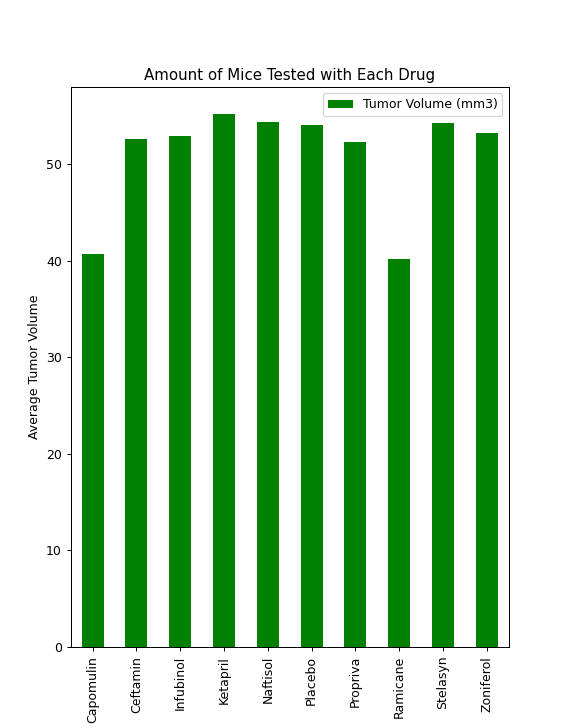

In [76]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
summary.plot(kind="bar", color = "green", figsize = (7,9))
plt.title("Amount of Mice Tested with Each Drug")
plt.xlabel("Drug")
plt.ylabel("Average Tumor Volume")
plt.show()

<IPython.core.display.Javascript object>


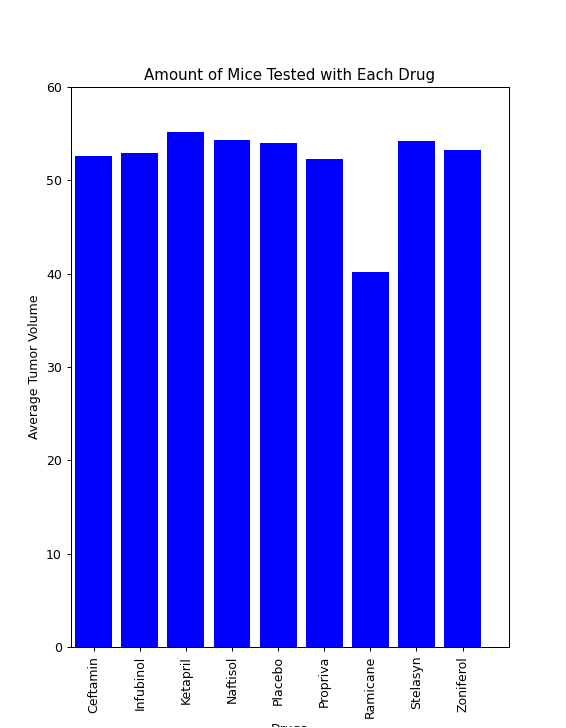

In [82]:
xAxis = np.arange(len(summaryDF))
ticks = [value for value in xAxis]

plt.figure(figsize=(7, 9))
plt.bar(xAxis, summary["Tumor Volume (mm3)"], color='blue', alpha=1)
plt.xticks(ticks, list(summaryDF.index), rotation="vertical")
plt.xlim(.5, len(xAxis))
plt.ylim(0, 60)
plt.title("Amount of Mice Tested with Each Drug")
plt.xlabel("Drugs")
plt.ylabel("Average Tumor Volume")
plt.show()


<IPython.core.display.Javascript object>


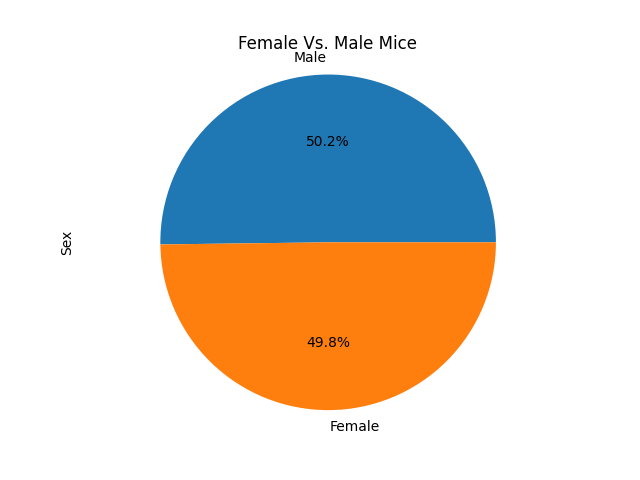

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
micecount = mouseData["Sex"].value_counts()
plt.figure()
miceCount.plot(kind="pie", autopct = "%1.1f%%")
plt.axis("equal")
plt.title("Female Vs. Male Mice")
plt.show()



<IPython.core.display.Javascript object>


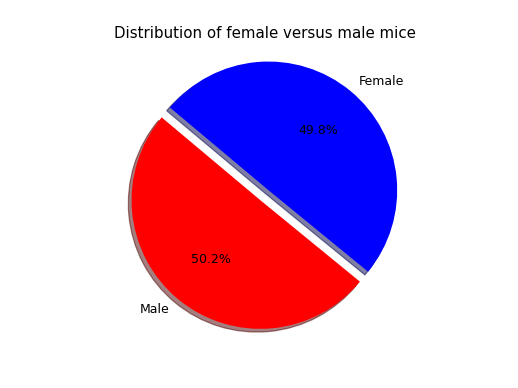

In [83]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["red","blue"]
explode = (0.1,0)
plt.figure()
plt.pie(miceCount.values, explode=explode, labels=micecount.index.values, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("Female Vs Male Mice")
plt.show()


## Quartiles, Outliers and Boxplots

In [100]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimen_data = combine_data[(combine_data["Drug Regimen"] == "Capomulin") | 
                          (combine_data["Drug Regimen"] == "Ramicane") | 
                          (combine_data["Drug Regimen"] == "Infubinol") | 
                          (combine_data["Drug Regimen"] == "Ceftamin")]

regimen_data = regimen_data[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
regimen_data = regimen_data.groupby(["Mouse ID", "Drug Regimen"])
regimenDF = regimen_data["Tumor Volume (mm3)"].sum().to_frame()
regimen_plot = regimenDF["Tumor Volume (mm3)"]
regimenDF.head()

# quartile calculations
quartiles = regimenPlot.quantile([.25,.5,.75])
lowerquartile = quartiles[0.25]
upperquartile = quartiles[0.75]
iqr = upperquartile-lowerquartile


In [101]:
print(f"The lower quartile is {lowerquartile}")
print(f"The upper quartile is {upperquartile}")
print(f"The interquartile range is {iqr}")
print(f"The the media is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound}")
print(f"Values above {upper_bound}")

The lower quartile is 340.0010610275
The upper quartile is 449.98455965499994
The interquartile range is 109.98349862749996
The the media is: 394.845840265 
Values below 175.02581308625005
Values above 614.9598075962499


<IPython.core.display.Javascript object>


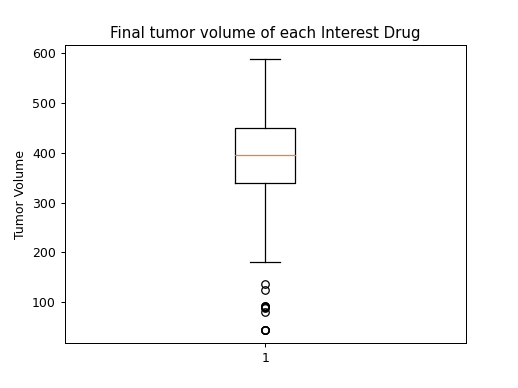

In [90]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final tumor volume of each Interest Drug')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(regimen_plot)
plt.show()

## Line and Scatter Plots

<IPython.core.display.Javascript object>


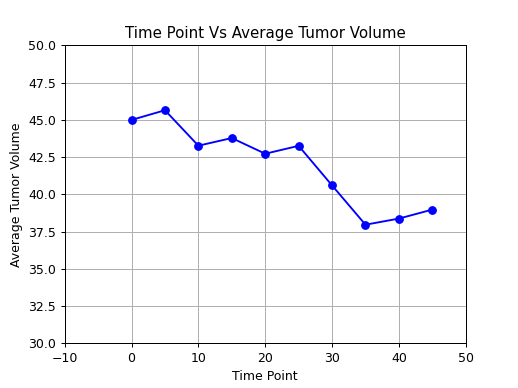

In [106]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
tumor_data = combine_data[(combine_data["Drug Regimen"] == "Capomulin") & (combine_data["Mouse ID"] == "b128")]
tumor_data = tumor_data.groupby(["Drug Regimen", "Timepoint"])
tumorDF = tumor_data["Tumor Volume (mm3)"].mean().to_frame()
tumor_index_dataDF = tumorDF.unstack(0)
tumor_plotDF = tumor_index_dataDF["Tumor Volume (mm3)"]

xAxis = [0,5,10,15,20,25,30,35,40,45]
plt.figure()
tumor_total= plt.plot(xAxis, tumor_plotDF["Capomulin"], marker= "o", color="blue", label="Total Tumor Volume" )
plt.title("Time Point Vs Average Tumor Volume")
plt.xlim(-10, 50)
plt.ylim(30, 50)
plt.xlabel("Time Point")
plt.ylabel("Average Tumor Volume")
plt.grid(True)
plt.show()

In [117]:
scatter_data = combine_data[(combine_data["Drug Regimen"] == "Capomulin")]
scatter_data = scatter_data[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
groupByData = scatter_data.groupby(["Mouse ID","Weight (g)"])
scatterdataDF = groupByData["Tumor Volume (mm3)"].mean().to_frame()
scatterdataDF = scatterdataDF.reset_index()
scatterdataDF.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


<IPython.core.display.Javascript object>


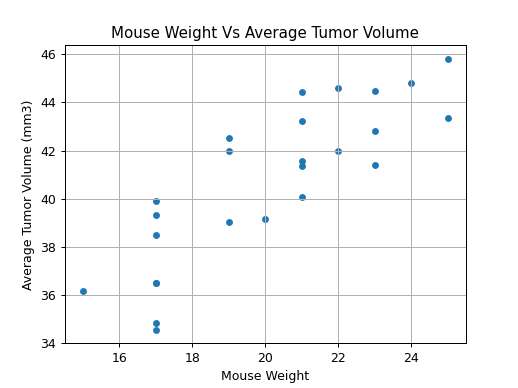

In [137]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatterdataDF.plot(x="Weight (g)", y="Tumor Volume (mm3)", kind = "scatter", marker="o")
plt.title("Mouse Weight Vs Average Tumor Volume")
#plt.xlim(10, 25)
#plt.ylim(30, 50)
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()

## Correlation and Regression

In [138]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(scatterdataDF["Weight (g)"], scatterdataDF["Tumor Volume (mm3)"])
print(f"The correlation is {(correlation[0])}")

The correlation is 0.8419363424694717


<IPython.core.display.Javascript object>


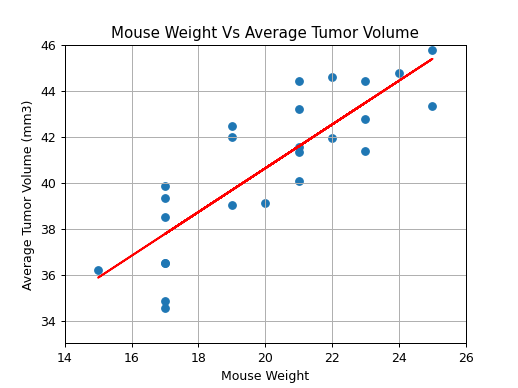

In [141]:
x_values = scatterdataDF["Weight (g)"]
y_values = scatterdataDF["Tumor Volume (mm3)"]
plt.figure()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope)) + "x + " + str(round(intercept))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlim(14, 26)
plt.ylim(33, 46)
plt.title("Mouse Weight Vs Average Tumor Volume")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()